In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df = pd.read_csv('tele9.csv')  

In [3]:
df.rename(columns={'Time Of Day':'time_of_day_long','Vehicle Speed': 'vehicle_speed', 'Engine Speed':'engine_speed','Throttle':'throttle','Lap Distance':'lap_distance'}, inplace=True)

In [4]:
df.columns

Index(['command', 'No', 'time_of_day_long', 'lap_distance', 'vehicle_speed',
       'engine_speed', 'Gear', 'Brake', 'throttle'],
      dtype='object')

In [5]:
df.head(10)

,command,No,time_of_day_long,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
0,$P,9,58683.411,1.47,45.46,3580,2,0,7.5
1,$P,9,58683.504,3.54,45.45,3581,2,0,7.5
2,$P,9,58683.598,5.61,45.63,3635,2,0,7.5
3,$P,9,58683.691,7.59,46.01,3587,2,0,8.0
4,$P,9,58683.784,9.66,45.83,3619,2,0,7.5
5,$P,9,58684.039,13.71,45.30,3588,2,0,7.5
6,$P,9,58684.123,15.78,45.48,3665,2,0,7.5
7,$P,9,58684.206,17.77,45.20,3599,2,0,7.5
8,$P,9,58684.300,19.84,45.14,3559,2,0,14.0
9,$P,9,58684.393,21.82,45.44,3741,2,0,24.5


In [6]:
df.Gear.unique()

array([2, 1, 3, 4, 5, 6, 0])

In [7]:
df.describe()

,No,time_of_day_long,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
count,81221.0,81221.000000,81221.000000,81221.000000,81221.000000,81221.000000,81221.000000,81221.000000
mean,9.0,64473.299180,2012.931366,164.170158,8900.567304,3.550830,1.474520,60.665493
std,0.0,3299.283799,1220.653000,61.721749,3379.528339,1.342014,7.907893,41.019138
min,9.0,58683.411000,0.250000,0.200000,0.000000,0.000000,0.000000,6.500000
25%,9.0,61606.663000,929.220000,97.180000,5896.000000,2.000000,0.000000,8.000000
50%,9.0,64583.886000,1907.250000,207.000000,11242.000000,4.000000,0.000000,77.500000
75%,9.0,67407.924000,3147.190000,216.380000,11621.000000,4.000000,0.000000,99.500000
max,9.0,69859.747000,4100.080000,233.550000,12468.000000,6.000000,100.000000,100.000000


In [8]:
df.rename(columns={'Time Of Day':'time_of_day_long','Vehicle Speed': 'vehicle_speed', 'Engine Speed':'engine_speed','Throttle':'throttle','Lap Distance':'lap_distance'}, inplace=True)

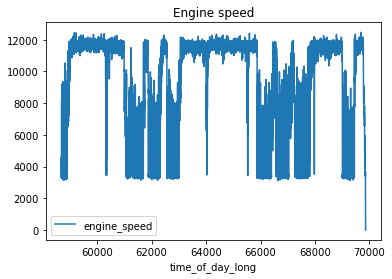

In [9]:
df.plot(x='time_of_day_long', y='engine_speed')
plt.title("Engine speed")
plt.show()

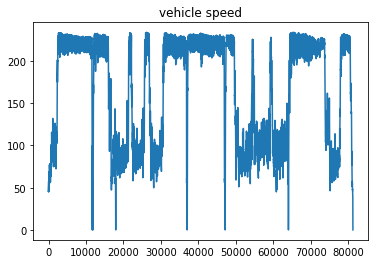

In [10]:
vehicle_speed = df['vehicle_speed'].values
plt.plot(vehicle_speed)
plt.title('vehicle speed')
plt.show()

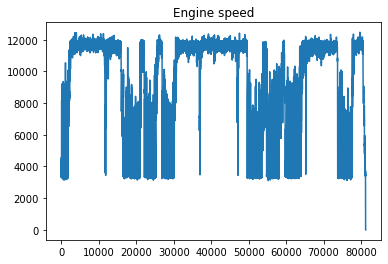

In [11]:
engine_speed = df['engine_speed'].values
plt.plot(engine_speed)
plt.title('Engine speed')
plt.show()

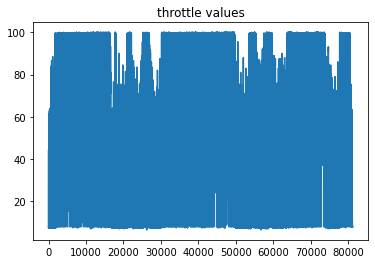

In [12]:
throttle = df['throttle'].values
plt.plot(throttle)
plt.title('throttle values')
plt.show()

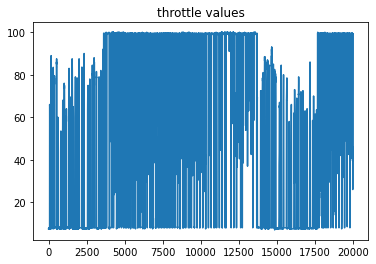

In [13]:
plt.plot(throttle[60000:80000])
plt.title('throttle values')
plt.show()

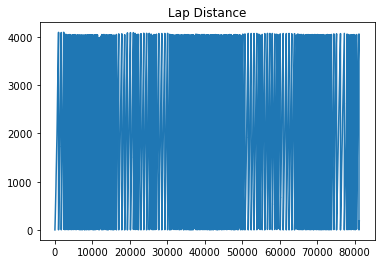

In [14]:
lap_distance = df['lap_distance'].values
plt.plot(lap_distance)
plt.title('Lap Distance')
plt.show()

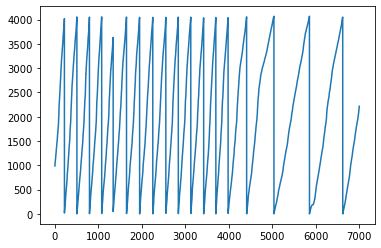

In [15]:
plt.plot(lap_distance[12000:19000])
plt.show()

In [16]:
df['vehicle_speed'].corr(df['throttle'])

0.691387794726912

In [17]:
df['lap_distance'].corr(df['engine_speed'])

4.216221820186025e-05

In [18]:
df['engine_speed'].corr(df['vehicle_speed'])

0.9089852635904314

In [19]:
df['lap_distance'].corr(df['throttle'])

0.08513554816780752

In [20]:
df['lap_distance'].corr(df['Brake'])

0.002834973611787427

In [21]:
df['time_diff'] = df['time_of_day_long'].diff(1)
df['time_diff']

0          NaN
1        0.093
2        0.094
3        0.093
4        0.093
         ...  
81216    0.093
81217    0.093
81218    0.094
81219    0.279
81220    0.093
Name: time_diff, Length: 81221, dtype: float64

In [22]:
dt=df['time_diff']
dt.describe()

count    81220.000000
mean         0.137606
std          0.212094
min          0.009000
25%          0.093000
50%          0.093000
75%          0.176000
max         46.804000
Name: time_diff, dtype: float64

In [23]:
df[df['time_diff'] >40]

,command,No,time_of_day_long,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle,time_diff
13340,$P,9,60612.301,47.19,229.49,11827,6,0,99.5,46.804


In [24]:
df=df.drop(['command','No','time_diff'], axis = 1)

In [25]:
df = df.set_index('time_of_day_long') 

In [26]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
time_of_day_long,,,,,,
58683.411,1.47,45.46,3580,2,0,7.5
58683.504,3.54,45.45,3581,2,0,7.5
58683.598,5.61,45.63,3635,2,0,7.5
58683.691,7.59,46.01,3587,2,0,8.0
58683.784,9.66,45.83,3619,2,0,7.5


In [27]:
df_gear = pd.get_dummies(df.Gear, prefix='Gear')

In [28]:
df_gear.head(5)

,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,
58683.411,0,0,1,0,0,0,0
58683.504,0,0,1,0,0,0,0
58683.598,0,0,1,0,0,0,0
58683.691,0,0,1,0,0,0,0
58683.784,0,0,1,0,0,0,0


In [29]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
time_of_day_long,,,,,,
58683.411,1.47,45.46,3580,2,0,7.5
58683.504,3.54,45.45,3581,2,0,7.5
58683.598,5.61,45.63,3635,2,0,7.5
58683.691,7.59,46.01,3587,2,0,8.0
58683.784,9.66,45.83,3619,2,0,7.5


In [30]:
df = df.drop('Gear',axis = 1)

In [31]:
df = df.drop('Brake',axis = 1)

In [32]:
df = df.drop('throttle',axis = 1)

In [33]:
'Brake','throttle'

('Brake', 'throttle')

In [34]:
df=df.join(df_gear)

In [35]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,,,,
58683.411,1.47,45.46,3580,0,0,1,0,0,0,0
58683.504,3.54,45.45,3581,0,0,1,0,0,0,0
58683.598,5.61,45.63,3635,0,0,1,0,0,0,0
58683.691,7.59,46.01,3587,0,0,1,0,0,0,0
58683.784,9.66,45.83,3619,0,0,1,0,0,0,0


In [36]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,,,,
58683.411,1.47,45.46,3580,0,0,1,0,0,0,0
58683.504,3.54,45.45,3581,0,0,1,0,0,0,0
58683.598,5.61,45.63,3635,0,0,1,0,0,0,0
58683.691,7.59,46.01,3587,0,0,1,0,0,0,0
58683.784,9.66,45.83,3619,0,0,1,0,0,0,0


In [37]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,,,,
58683.411,1.47,45.46,3580,0,0,1,0,0,0,0
58683.504,3.54,45.45,3581,0,0,1,0,0,0,0
58683.598,5.61,45.63,3635,0,0,1,0,0,0,0
58683.691,7.59,46.01,3587,0,0,1,0,0,0,0
58683.784,9.66,45.83,3619,0,0,1,0,0,0,0


In [38]:
df = df.drop('Gear_0',axis = 1)
df = df.drop('Gear_1',axis = 1)
df = df.drop('Gear_2',axis = 1)
df = df.drop('Gear_3',axis = 1)
df = df.drop('Gear_4',axis = 1)
df = df.drop('Gear_5',axis = 1)
df = df.drop('Gear_6',axis = 1)

In [39]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed
time_of_day_long,,,
58683.411,1.47,45.46,3580
58683.504,3.54,45.45,3581
58683.598,5.61,45.63,3635
58683.691,7.59,46.01,3587
58683.784,9.66,45.83,3619


In [40]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
X_train,X_test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(X_train.shape,X_test.shape)

(64976, 3) (16245, 3)


In [41]:
X_train_df=X_train
X_test_df=X_test

In [42]:
print(X_train.shape)
print(X_test.shape)

(64976, 3)
(16245, 3)


In [43]:
X_train.shape

(64976, 3)

In [44]:
X_test.shape

(16245, 3)

In [45]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [46]:
X_train=X_train.apply(lambda x: x / np.max(x), axis=0)
X_test=X_test.apply(lambda x: x / np.max(x), axis=0)

In [47]:
X_train.head(5)

,lap_distance,vehicle_speed,engine_speed
time_of_day_long,,,
58683.411,0.000359,0.194648,0.287851
58683.504,0.000863,0.194605,0.287931
58683.598,0.001368,0.195376,0.292273
58683.691,0.001851,0.197003,0.288414
58683.784,0.002356,0.196232,0.290987


In [48]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(X_train,X_train, TIME_STEPS)
X_test, y_test = create_dataset(X_test,X_test, TIME_STEPS)

print(X_train.shape)

(64946, 30, 3)


In [49]:
print(X_train.shape)
print(X_test.shape)

(64946, 30, 3)
(16215, 30, 3)


In [50]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [51]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128,input_shape=(30,3)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=30))
model.add(keras.layers.LSTM(units=128, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=3)))
model.compile(loss='mae', optimizer='adam')

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67584     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 3)             387       
Total params: 199,555
Trainable params: 199,555
Non-trainable params: 0
__________________________________________________

In [53]:
history = model.fit(X_train,X_train, epochs=1000, batch_size=512, validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/1000
115/115 [==============================] - 19s 162ms/step - loss: 0.1214 - val_loss: 0.0742
Epoch 2/1000
115/115 [==============================] - 18s 158ms/step - loss: 0.0860 - val_loss: 0.0757
Epoch 3/1000
115/115 [==============================] - 18s 158ms/step - loss: 0.0750 - val_loss: 0.0478
Epoch 4/1000
115/115 [==============================] - 18s 157ms/step - loss: 0.0653 - val_loss: 0.0560
Epoch 5/1000
115/115 [==============================] - 18s 158ms/step - loss: 0.0675 - val_loss: 0.0520
Epoch 6/1000
115/115 [==============================] - 18s 157ms/step - loss: 0.0652 - val_loss: 0.0553


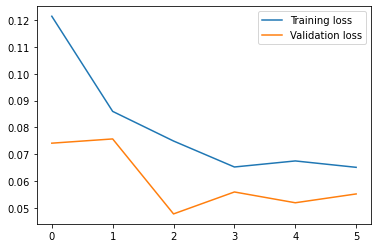

In [54]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [55]:
model.evaluate(X_test,X_test)

507/507 [==============================] - 7s 14ms/step - loss: 0.0555


0.055515166372060776

In [56]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

In [57]:
train_mae_loss.shape

(64946, 3)

Reconstruction error threshold: 0.5646694540918262


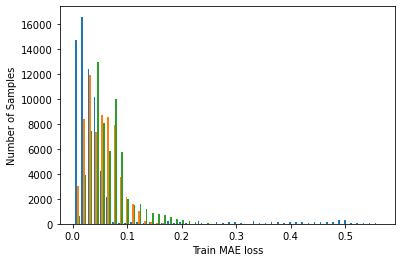

In [58]:
plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');
threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

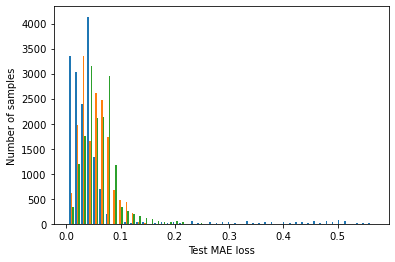

In [59]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [60]:
y_pred = model.predict(X_test)
print('Predict shape:', y_pred.shape); 
mae = np.mean(np.abs(y_pred - X_test), axis=1)
pred = y_pred.reshape((y_pred.shape[0] * y_pred.shape[1]), y_pred.shape[2])
print('Prediction:', pred.shape);
print('Test data shape:', X_test.shape); 
X_test = X_test.reshape((X_test.shape[0] * X_test.shape[1]), X_test.shape[2])
print('Test data:', X_test.shape);
errors = X_test - pred
print('Error:', errors.shape); 
RMSE = math.sqrt(mean_squared_error(X_test,pred))
print('Test RMSE: %.3f' % RMSE);

Predict shape: (16215, 30, 3)
Prediction: (486450, 3)
Test data shape: (16215, 30, 3)
Test data: (486450, 3)
Error: (486450, 3)
Test RMSE: 0.092


In [176]:
dist = np.linalg.norm(X_test-pred,axis=1)
scores = dist.copy()
print('Score :',scores.shape);
scores.sort();
cut_off = int(0.94*len(scores));
print('Cut off value :',cut_off);
threshold=scores[cut_off];
print('Threshold Value :',threshold);

Score : (486450,)
Cut off value : 457263
Threshold Value : 0.2122115800268795


In [177]:
X_test.shape

(486450, 3)

In [178]:
X_test[0]

array([0.67157314, 0.90916488, 0.93254732])

In [179]:
pred[0]

array([0.646438 , 0.8535591, 0.8404531], dtype=float32)

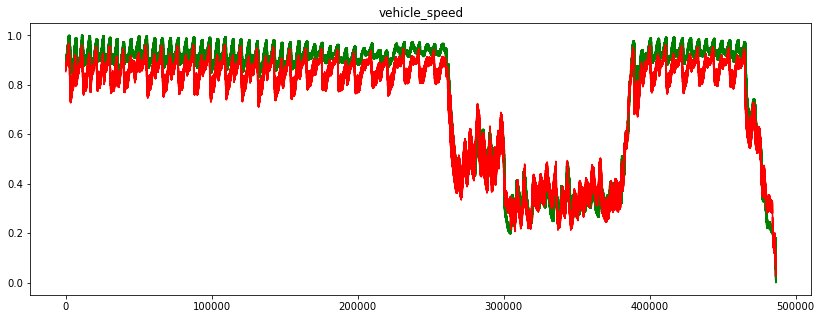

In [180]:
plt.figure(figsize=(14,5))
plt.plot(X_test[:,1],color='green')
plt.plot(pred[:,1],color='red')
plt.title('vehicle_speed')
plt.show()

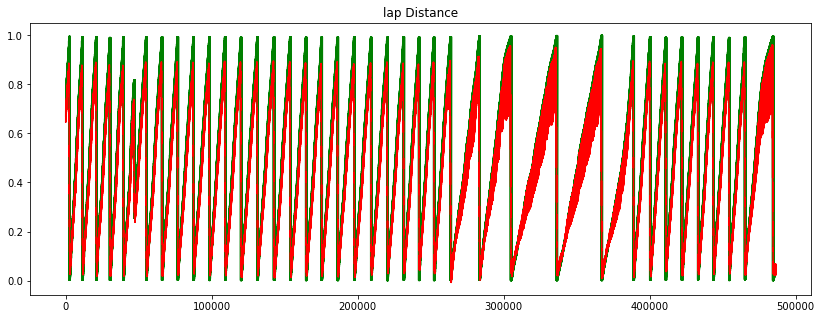

In [181]:
plt.figure(figsize=(14,5))
plt.plot(X_test[:,0],color='green')
plt.plot(pred[:,0],color='red')
plt.title('lap Distance')
plt.show()

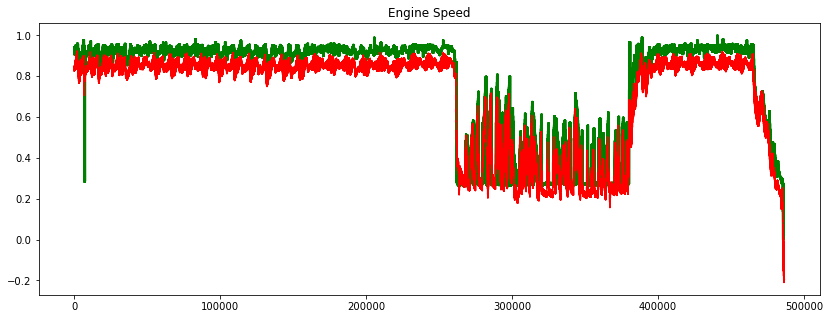

In [182]:
plt.figure(figsize=(14,5))
plt.plot(X_test[:,2],color='green')
plt.plot(pred[:,2],color='red')
plt.title('Engine Speed')
plt.show()

In [183]:
threshold

0.2122115800268795

In [184]:
THRESHOLD = threshold

In [185]:
test_mae_loss.shape

(16215, 3)

In [186]:
test_mae_loss=test_mae_loss[:, [0,1,2]]

In [187]:
type(test_mae_loss)

numpy.ndarray

In [188]:
test_mae_loss_mean=np.mean(test_mae_loss, axis = 1)

In [189]:
test_mae_loss_mean.shape

(16215,)

In [190]:
test_mae_loss_mean=test_mae_loss_mean.reshape((-1,1))

In [191]:
test_mae_loss_mean.shape

(16215, 1)

In [192]:
X_test_df.shape

(16245, 3)

In [193]:
X_test_df.iloc[30:].shape

(16215, 3)

In [194]:
test_score_df = pd.DataFrame(index=X_test_df.iloc[30:].index)

In [195]:
test_score_df['loss'] = test_mae_loss_mean

In [196]:
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

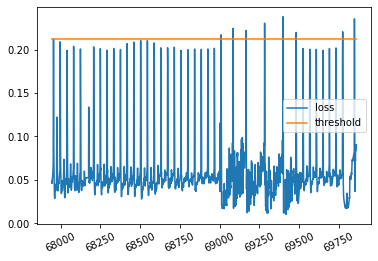

In [197]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [198]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly
time_of_day_long,,,
69009.864,0.215328,0.212212,True
69010.026,0.216944,0.212212,True
69010.109,0.215236,0.212212,True
69084.792,0.219797,0.212212,True
69084.885,0.223877,0.212212,True


In [199]:
anomalies.tail()

,loss,threshold,anomaly
time_of_day_long,,,
69849.039,0.233853,0.212212,True
69849.132,0.231251,0.212212,True
69849.309,0.228353,0.212212,True
69849.402,0.222998,0.212212,True
69849.588,0.215516,0.212212,True
